<a href="https://colab.research.google.com/github/diegogf99/Clase3/blob/master/Actividad_3_Astronom%C3%ADa_Gal%C3%A1ctica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EI2001: Ciencia de datos en Astronomía
**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

#Actividad Clase 3 - Uso de Astropy y Pandas.

###Objetivos:
1. Conocer la librerías Astropy y Pandas.
2. Reconocer el uso de Astropy con imágenes astronómicas. 
3. Trabajar con Pandas y bases de datos de exoplanetas.

##Astropy

([Documentación](https://docs.astropy.org/en/stable/))


`Astropy` es una de las librerías de Python que más se ocupan en astronomía. Incluye módulos y herramientas muy útiles y necesarias en astronomía, como por ejemplo:
- Constantes astronómicas y cosmológicas.
- Conversiones de tiempo y distancias.
- Manejo de datos astronómicos en formas de `ndarray`.
- Transformaciones de systemas de coordenadas.
- Herramientas para analysis estadístico y modelamiento.
- etc.

Como vimos en clases, el tipo de archivo más utilizado para manejar imágenes astrómicas es el `FIT: Flexible Image Transport`. La mayoría de los telescopios en el mundo utiliza este sistema de almacenaje de datos y la comunidad astronómica lo ha hecho uno de sus estándares más importantes.

###FIT

Sistema de almacenamiento de datos astronómicos en forma de `ndarray`. Tiene dos componentes principales: header y data. Header es una tabla de información con la forma de diccionario, mientras que data puede ser un `array` de 2 dimiensiones o un cubo, con más de dos dimensiones. Para los siguientes ejempos consideraremos la componente data como un `ndarray` de dos dimensiones.






###1. Abrir y leer un archivo `FIT` de la Nebulosa Horse Head

In [0]:
# Importar las librerías que usaremos: matplotlib y astropy. 
# Considerar que solo ocuparemos los módulos fits y download_file de astropy.

import matplotlib.pyplot as plt
from astropy.io import fits 
from astropy.utils.data import download_file
import numpy as np


In [0]:
# Descargamos el archivo FIT
file = download_file("https://github.com/astrodatos/Clase3/raw/master/HorseHead.fits", cache=True )

In [0]:
# Abrir archivo fits guardado en file
hdu = fits.open(file)

In [5]:
# Por si solo, es un objeto
hdu

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fd4b68d3c50>, <astropy.io.fits.hdu.table.TableHDU object at 0x7fd4b68d3c90>]

In [6]:
hdu.info()

Filename: /root/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


### 2. Guardar header y data en variables independientes

In [10]:
# Guardamos el header en una variable
header_data = hdu[0].header
header_data

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

In [9]:
print("Tercer elemento del header:")
print(header_data[2])

print("Valor de la casilla DATE:")
print(header_data["DATE"])

Tercer elemento del header:
2
Valor de la casilla DATE:
2014-01-09


In [11]:
# Guardamos los datos del fit en otra variable
image_data = hdu[0].data
print(image_data)

[[ 7201  6642  6642 ...  9498  9498 10057]
 [ 6642  6363  6642 ... 10057 10616 10616]
 [ 6922  6642  6922 ... 10337 11175 10616]
 ...
 [ 5412  5132  5412 ... 13000 12580 12021]
 [ 5796  5517  5796 ... 12546 12546 11987]
 [ 5796  5796  6076 ... 11987 12546 12546]]


In [12]:
print("Elemento de los datos en la fila 0:")
print(image_data[0])

print("Segundo elemento de la matriz de datos:")
print(image_data[1][1])

Elemento de los datos en la fila 0:
[ 7201  6642  6642  7219  7498  6939  7219  7358  7358  7358  7358  7044
  6764  6345  6625  7323  7323  7743  7184  6651  6651  6791  7350  7000
  6441  6721  7559  7315  6756  6895  7175  7804  8363  8223  7664  7018
  7018  7577  7856  7297  7297  7297  7297  7542  7542  7821  8101  8241
  7961  7821  7821  8294  8294  7596  7596  7875  8155  8294  8015  8679
  9797 10915 13430 17483 21396 21815 21536 21710 21990 21431 21151 19265
 14793 11578  9622  8259  7980  7840  7840  8120  7840  7700  7421  6906
  6626  6766  7325  7814  7814  7814  7814  7290  7290  7430  7150  6591
  6591  7569  7849  7622  8181  8880  7762  7762  8321  7762  7482  7866
  7866  7447  7447  7796  8355  8635  8076  7133  7133  6853  6294  6993
  7831  7831  7552  7272  7272  7272  7272  7692  7412  7412  7692  7325
  7604  7604  7045  7045  7325  8024  8024  7500  7220  7360  7919  7639
  7639  7639  7360  7211  7491  7631  8190  7840  7561  7700  7421  6687
  6408  7106  7

In [13]:
print(image_data.shape)

(893, 891)


In [14]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))



('Min:', 3759)
('Max:', 22918)
('Mean:', 9831.481676287574)
('Stdev:', 3032.3927542049046)


###3. Plotear la imagen

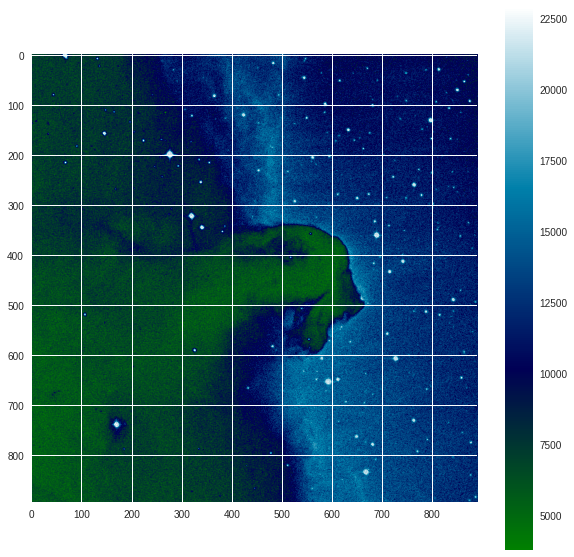

In [26]:
# Plot de los datos del fit
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='ocean') #gray, inferno, etc
plt.colorbar()

#Pandas

La librería `Pandas`es muy útil para el manejo de estructuras de datos. Está basado en `Numpy` pero incluye un nuevo concepto llamado Data Frame. Los Data Frame son arreglos multidimensionales, con sus respectivas etiquetas en filas y columnas, los cuales generalmente tienen distintos tipos de datos en su estructura como también datos faltantes. Todo lo anterior hace que `Pandas`  sea la mejor librería para trabajar con bases de datos.

In [0]:
# Importar librería
import pandas as pd

###1. El objeto Serie

Una `Serie` es un arreglo unidimensional de datos indexados, esto quiere decir que está formado por una secuencia de valores y una secuencia de índices.
Se construye de la forma: 

```
pd.Series(data,index=index)
```



In [28]:
# Creamos un objeto Series de Pandas
data = pd.Series([0.5, 0.32, 3])
print(data)

0    0.50
1    0.32
2    3.00
dtype: float64


In [29]:
print("Mostrar los valores que guarda la Serie data:")
print(data.values)

Mostrar los valores que guarda la Serie data:
[0.5  0.32 3.  ]


In [30]:
print("Mostrar los índices de la Serie data:")
print(data.index)

Mostrar los índices de la Serie data:
RangeIndex(start=0, stop=3, step=1)


In [31]:
print("Tercer elemento de la Serie data:")
print(data[2])

Tercer elemento de la Serie data:
3.0


In [32]:
print("Podemos hacer slicing:")
print(data[0:2])

Podemos hacer slicing:
0    0.50
1    0.32
dtype: float64


In [36]:
# Podemos cambiar el formato de los índices
data = pd.Series(data= [0.25, 0.5, 0.75, 1.0],index=['m', 'g', 'c', 'd']) #los indices pueden ser literal lo que sea xd

print(data)

m    0.25
g    0.50
c    0.75
d    1.00
dtype: float64


In [37]:
print("Ahora el que vive en el índice b es:")
print(data['m'])

Ahora el que vive en el índice b es:
0.25


In [38]:
# No necesariamente tienen que ser índices consecutivos
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=[2, 5, 3, 7])

print(data)

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64


In [39]:
print("El elemento del índice 3:")
print(data[3])

El elemento del índice 3:
0.75


In [40]:
# Se pueden crear máscaras: masking
print("Los elementos mayores que 0.3 pero menores que 0.8:")
print(data[(data > 0.3) & (data < 0.8)])

Los elementos mayores que 0.3 pero menores que 0.8:
5    0.50
3    0.75
dtype: float64


###2. El objeto Data Frame

Los `Data Frame` de `Pandas` son `Series` en 2 dimensiones, con flexibilidad en los índices de las filas y en las etiquetas de las columnas. Se puede pensar que los `Data Frame` son secuencias alineadas (que comparten el mismo índice) de varias Series.

In [41]:
# Creamos diccionario, con forma de Serie, con las poblaciones de distintos estados de USA

population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

population = pd.Series(population_dict)

print(population)


California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64


In [42]:
print("La poblacion de California es:")
print(population['California'])



La poblacion de California es:
38332521


In [43]:
print(population['California':'Illinois'])

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64


In [44]:
# Creamos diccionario con el área superficial de los mismos estados utilizados anteriormente:

area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}

area = pd.Series(area_dict)

print(area)

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64


In [45]:
# Creamos Data Frame de los estados, considerando area y población:

states = pd.DataFrame({'population': population,
                       'area': area})
print(states)

              area  population
California  423967    38332521
Florida     170312    19552860
Illinois    149995    12882135
New York    141297    19651127
Texas       695662    26448193


In [46]:
print("Los indices son:")
print(states.index)

Los indices son:
Index([u'California', u'Florida', u'Illinois', u'New York', u'Texas'], dtype='object')


In [47]:
print("Las columnas del Data Frame son:")
print(states.columns)

Las columnas del Data Frame son:
Index([u'area', u'population'], dtype='object')


In [48]:
print("Los valores solo de la columna area:")
print(states['area'])

Los valores solo de la columna area:
California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64


In [49]:
# Creamos un Data Frame solo con la columna population:

pop = pd.DataFrame(population, columns=['population'])

print(pop)

            population
California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193


###3. Usar Pandas para trabajar con la base de datos de NASA Exoplanet Archive.


In [50]:
# Cargamos la base de datos
archivo = download_file('https://raw.githubusercontent.com/piacortes/astroclases/master/planets.csv?token=AXWBlnRlbOADXAfY-qtBxFJQ3SugzCucks5cpBbnwA%3D%3D')
planetas = pd.read_csv(archivo, comment="#") #lee archivos formato csv

In [52]:
# Revisar los primeros elementos de la base de datos:
planetas.head()

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn
0,11 Com,b,11 Com b,Radial Velocity,0,1,326.03000,0.32,-0.32,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.21997,3.20,-3.20,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,14 And,b,14 And b,Radial Velocity,0,1,185.84000,0.23,-0.23,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3,14 Her,b,14 Her b,Radial Velocity,0,1,1773.40002,2.50,-2.50,0.0,...,0.537,0.001,0.0,0.366,0.002,0.0,0.438,0.006,0.0,9.0
4,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1,798.50000,1.00,-1.00,0.0,...,0.418,0.003,0.0,0.222,0.003,0.0,0.351,0.003,0.0,17.0


In [53]:
print("Cuántas filas y columnas tiene?:")
print(planetas.shape)

Cuántas filas y columnas tiene?:
(3925, 355)


In [54]:
# Promedio del período, según técnica de descrubrimiento
planetas.groupby('pl_discmethod')["pl_orbper"].mean() #groupby:(los objetos)[respecto a] y mean==promedio

pl_discmethod
Astrometry                          246.360000
Eclipse Timing Variations          3882.055556
Imaging                          821806.900000
Microlensing                       2648.285714
Orbital Brightness Modulation         0.580752
Pulsar Timing                        38.085794
Pulsation Timing Variations        1005.000000
Radial Velocity                     881.184820
Transit                              26.236660
Transit Timing Variations           123.244594
Name: pl_orbper, dtype: float64

In [55]:
# Masking
obs = planetas[planetas["pl_trandep"]>0.35]
print(obs.shape)

(234, 355)


Text(0,0.5,'Masa')

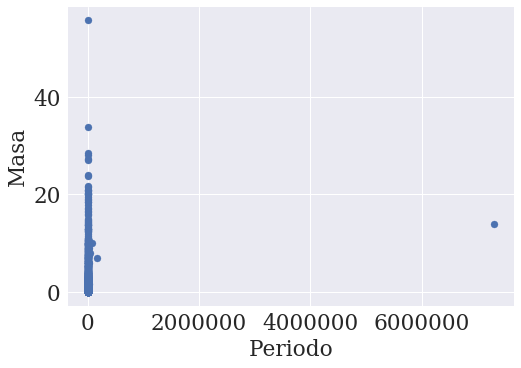

In [56]:
# Plots
from matplotlib.pyplot import rcParams
plt.rc('font', family='serif',size=15)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
rcParams.update(params)



plt.scatter(planetas["pl_orbper"],planetas["pl_bmassj"])
plt.xlabel("Periodo")
plt.ylabel("Masa")

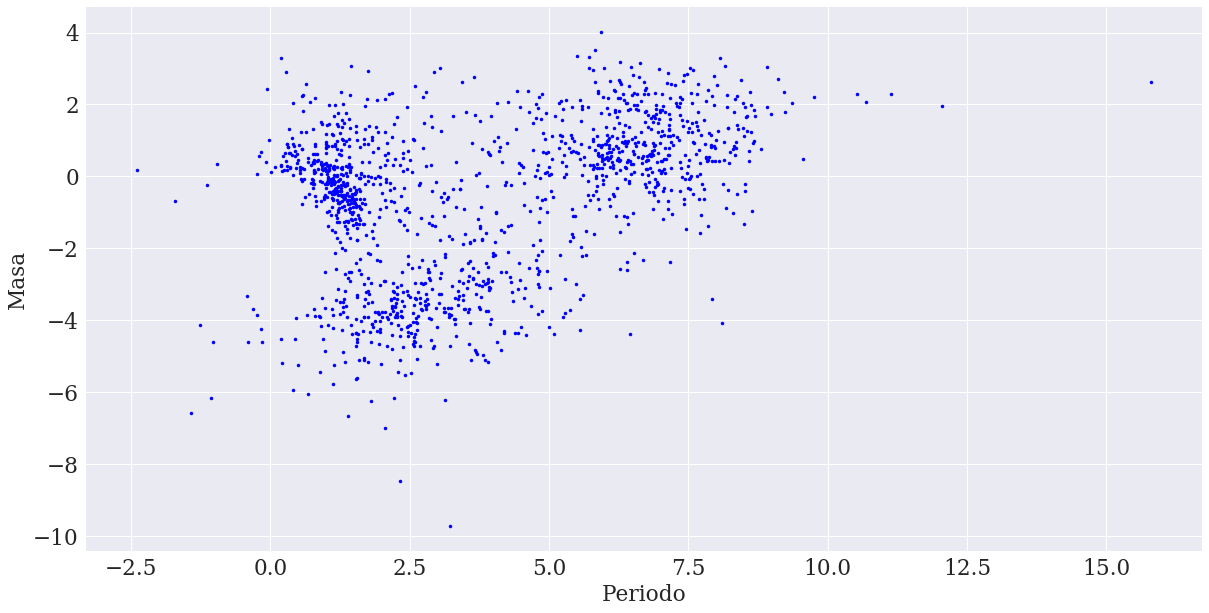

In [58]:
# Aplicamos logaritmo a los ejes:

plt.figure(figsize=(20,10))

plt.xlabel("Periodo")
plt.ylabel("Masa")
plt.plot(np.log(planetas["pl_orbper"]),np.log(planetas["pl_bmassj"]), ".", color="blue")

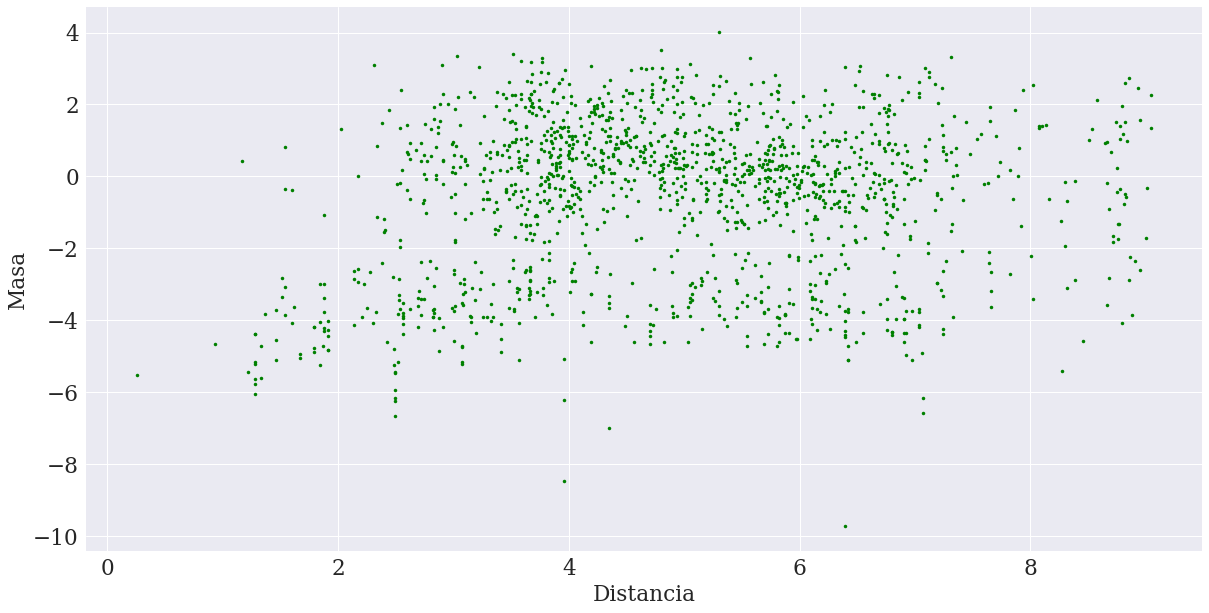

In [60]:
plt.figure(figsize=(20,10))

plt.xlabel("Distancia")
plt.ylabel("Masa")
plt.plot(np.log(planetas["st_dist"]),np.log(planetas["pl_bmassj"]), ".", color="green")